# SRC and HCK Interaction Analysis Pipeline

### 1. Library Imports and Setup

In [31]:
# Import all required libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib_venn import venn2

import seaborn as sns
import os
import subprocess
import math
from scipy.optimize import curve_fit
from scipy import stats

# Import or install uncertainties package
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

# Import custom PPI module
import importlib
import PPI_Script as ppi
importlib.reload(ppi)

<module 'PPI_Script' from '/home/gogllab/Desktop/Quantitative_Interactomics/PPI_Script.py'>

### 2. Data Loading

In [34]:
# Read input files
df_Human= ppi.read_csv_file('/home/gogllab/Desktop/Quantitative_Interactomics/input/Human.csv', header=0)
df_Mouse= ppi.read_csv_file('/home/gogllab/Desktop/Quantitative_Interactomics/input/Mouse.csv', header=0)

# Get concentrations for SRC and HCK proteins in both species
Human_SRC_Concentration_µM = ppi.get_protein_concentration(df_Human, 'P12931')
Human_HCK_Concentration_µM = ppi.get_protein_concentration(df_Human, 'P08631')
Mouse_SRC_Concentration_µM = ppi.get_protein_concentration(df_Mouse, 'P05480')
Mouse_HCK_Concentration_µM = ppi.get_protein_concentration(df_Mouse, 'P08103')

# Print the concentration values
print("Human SRC Concentration (µM):", Human_SRC_Concentration_µM)
print("Human HCK Concentration (µM):", Human_HCK_Concentration_µM)     
print("Mouse SRC Concentration (µM):", Mouse_SRC_Concentration_µM)
print("Mouse HCK Concentration (µM):", Mouse_HCK_Concentration_µM)

File /home/gogllab/Desktop/Quantitative_Interactomics/input/Human.csv loaded successfully.
File /home/gogllab/Desktop/Quantitative_Interactomics/input/Mouse.csv loaded successfully.
Human SRC Concentration (µM): 0.0138412360642524
Human HCK Concentration (µM): 0.202826341460089
Mouse SRC Concentration (µM): 0.0532781065601749
Mouse HCK Concentration (µM): 0.11302227560547


### 3. Apparent Binding Constant (Kapp) Calculation

In [ ]:
# Calculate Kapp for SRC and HCK + delta_pKapp

df_Human = ppi.calculate_Kapp(df_Human, gene_id="HNRNPK")
df_Mouse = ppi.calculate_Kapp(df_Mouse, gene_id="HNRPK")

# Save results to CSV files
ppi.save_csv_file(df_Human, '/home/gogllab/Desktop/Quantitative_Interactomics/output/Human.csv')
ppi.save_csv_file(df_Mouse, '/home/gogllab/Desktop/Quantitative_Interactomics/output/Mouse.csv')

### 4. Complexome Analysis

In [ ]:
# Calculate human complexome

ppi.add_complexome_column(df_Human, Human_SRC_Concentration_μM, 'SRC')
ppi.add_complexome_column(df_Human, Human_HCK_Concentration_μM, 'HCK')
ppi.calculate_complexome_difference(df_Human, 'SRC', 'HCK')


# Calculate mouse complexome
ppi.add_complexome_column(df_Mouse, Mouse_SRC_Concentration_μM, 'SRC')
ppi.add_complexome_column(df_Mouse, Mouse_HCK_Concentration_μM, 'HCK')
ppi.calculate_complexome_difference(df_Mouse, 'SRC', 'HCK')


# Test: Display results for HNRNPK (Human) and HNRPK (Mouse)
for species, df, gene in [('Humain', df_Human, 'HNRNPK'), ('Souris', df_Mouse, 'HNRPK')]:
    row = df[df['Gene_ID'] == gene]
    print(f"\nTest sur {gene} ({species})\n", row[['Gene_ID', 'Uniprot_ID', 'Concentration_µM',
                                                    'SRC_pKapp_sign', 'SRC_Kapp_sign',
                                                    'HCK_pKapp_sign', 'HCK_Kapp_sign', 'delta_pKapp',
                                                    'SRC_Complexome', 'HCK_Complexome', 'delta_complexome']])
    
# Save updated CSV files
ppi.save_csv_file(df_Human,'/home/gogllab/Desktop/Quantitative_Interactomics/output/Human.csv')
ppi.save_csv_file(df_Mouse,'/home/gogllab/Desktop/Quantitative_Interactomics/output/Mouse.csv')


### 5. Log Scale Transformation

In [ ]:
# Apply log scale to selected columns
columns_to_log = ['Concentration_µM','SRC_Complexome', 'HCK_Complexome', 'delta_complexome']
df_Human = ppi.apply_log_transformation(df_Human, columns_to_log)
df_Mouse = ppi.apply_log_transformation(df_Mouse, columns_to_log)

# Test: Display transformed results for HNRNPK (Human) and HNRPK (Mouse)
for species, df, gene in [('Humain', df_Human, 'HNRNPK'), ('Souris', df_Mouse, 'HNRPK')]:
    row = df[df['Gene_ID'] == gene]
    print(f"\nTest sur {gene} ({species})\n", row.reindex(fill_value='N/A'))

# Save results to CSV files
ppi.save_csv_file(df_Human,'/home/gogllab/Desktop/Quantitative_Interactomics/output/Human.csv')
ppi.save_csv_file(df_Mouse,'/home/gogllab/Desktop/Quantitative_Interactomics/output/Mouse.csv')

### 6. Intra-species Complexome Ratio Calculation

In [ ]:
# Calculate intra-species complexome ratio
df_Human = ppi.calculate_intra_complexome_ratio(df_Human, 'SRC', 'HCK')
df_Mouse = ppi.calculate_intra_complexome_ratio(df_Mouse, 'SRC', 'HCK')

# Test: Display results for HNRNPK (Human) and HNRPK (Mouse)
for species, df, gene in [('Humain', df_Human, 'HNRNPK'), ('Souris', df_Mouse, 'HNRPK')]:
    row = df[df['Gene_ID'] == gene]
    print(f"\nTest sur {gene} ({species})\n", row.reindex(fill_value='N/A'))

# Save results to CSV files
ppi.save_csv_file(df_Human,'/home/gogllab/Desktop/Quantitative_Interactomics/output/Human.csv')
ppi.save_csv_file(df_Mouse,'/home/gogllab/Desktop/Quantitative_Interactomics/output/Mouse.csv')


### 7. Creating Matched Dataset

In [ ]:
# Create matching file between human and mouse data

ppi.create_merged_species_dataset(
    human_path="/home/gogllab/Desktop/Quantitative_Interactomics/output/Human.csv",
    mouse_path="/home/gogllab/Desktop/Quantitative_Interactomics/output/Mouse.csv",
    output_path="/home/gogllab/Desktop/Quantitative_Interactomics/output/Matching.csv",
)

### 8. Venn Diagram Analysis of Partners

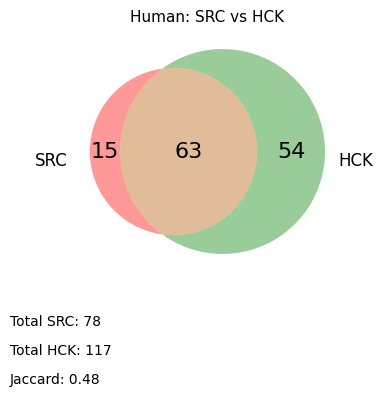

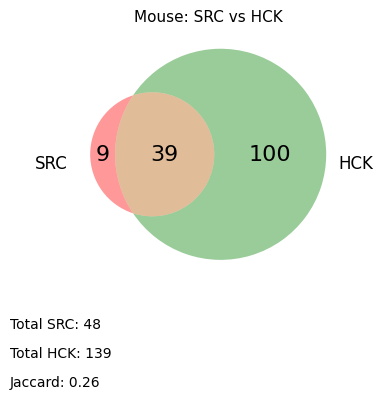

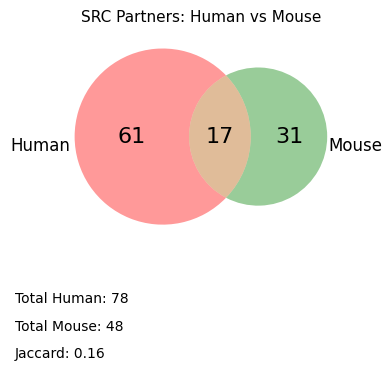

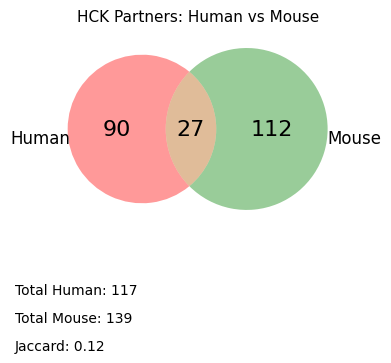

In [33]:
# Reload the matched dataset
df_Matching = pd.read_csv('/home/gogllab/Desktop/Quantitative_Interactomics/output/Matching.csv', header=[0, 1])

# Generate Venn diagrams for different comparisons

# Intra-species comparisons (SRC vs HCK partners)
ppi.plot_venn_partners(df_Matching, 'Human_Venn_Diagram', species='Human', interspecies=False)
ppi.plot_venn_partners(df_Matching, 'Mouse_Venn_Diagram', species='Mouse', interspecies=False)

# Inter-species comparisons (Human vs Mouse partners for each protein)
ppi.plot_venn_partners(df_Matching, 'SRC_H_M_Venn_Diagram', bait='SRC', interspecies=True)
ppi.plot_venn_partners(df_Matching, 'HCK_H_M_Venn_Diagram', bait='HCK', interspecies=True)

### 9. Complexome Visualization


Human SRC Complexome partners:

      Human                                                                  
    Gene_ID Uniprot_ID log_Concentration_µM SRC_pKapp_sign log_SRC_Complexome
127  HNRNPK     P61978             1.095609       4.901348          -2.161500
194  CAVIN1     Q6NZI2             0.849147       4.532432          -2.571066
217    CAV1     Q03135             0.792293       4.020836          -3.073114
448    SFPQ     P23246             0.401466       4.141035          -3.331289
493    PAK2     Q13177             0.345865       3.974973          -3.547039
Figure saved: /home/gogllab/Desktop/Quantitative_Interactomics/output/Complexome_Plots/Human_SRC_Complexome_Analysis.png


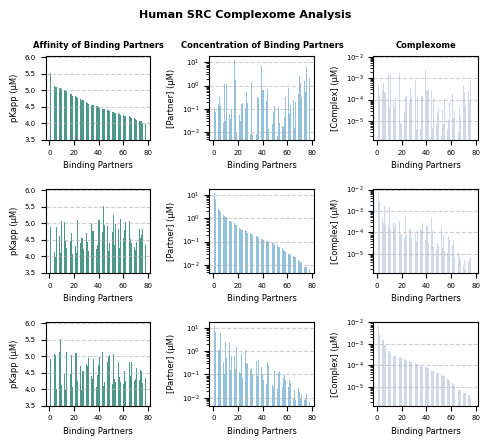


Human HCK Complexome partners:

      Human                                                                  
    Gene_ID Uniprot_ID log_Concentration_µM HCK_pKapp_sign log_HCK_Complexome
127  HNRNPK     P61978             1.095609       5.202754          -0.871440
194  CAVIN1     Q6NZI2             0.849147       4.721026          -1.262417
448    SFPQ     P23246             0.401466       4.666446          -1.676254
493    PAK2     Q13177             0.345865       4.509681          -1.869878
560  CAVIN3     Q969G5             0.257848       5.274912          -1.296738
Figure saved: /home/gogllab/Desktop/Quantitative_Interactomics/output/Complexome_Plots/Human_HCK_Complexome_Analysis.png


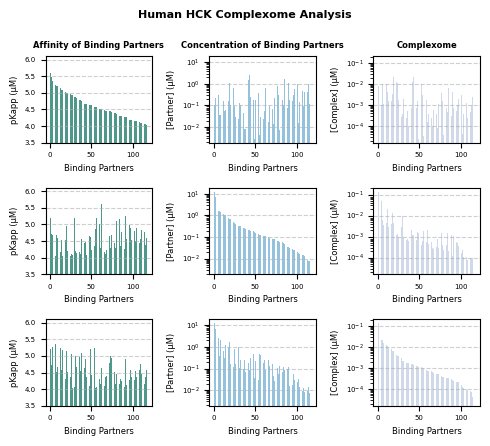


Mouse SRC Complexome partners:

      Mouse                                                                   
    Gene_ID  Uniprot_ID log_Concentration_µM SRC_pKapp_sign log_SRC_Complexome
16   Gm7324  A0A2I3BRL8            -0.307274       4.355387          -3.230676
127   HNRPK      P61979             1.003078       4.960760          -1.593512
448    SFPQ      Q8VIJ6             0.135598       4.411654          -2.741804
632    VASP      P70460             0.277237       4.658128          -2.374876
706   DDX17      Q501J6            -0.003616       3.931167          -3.349754
Figure saved: /home/gogllab/Desktop/Quantitative_Interactomics/output/Complexome_Plots/Mouse_SRC_Complexome_Analysis.png


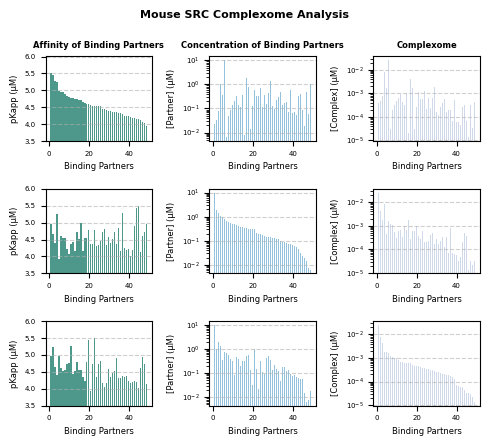


Mouse HCK Complexome partners:

     Mouse                                                                   
   Gene_ID  Uniprot_ID log_Concentration_µM HCK_pKapp_sign log_HCK_Complexome
4     ENV1      P10404             0.484017       4.248724          -2.237736
16  Gm7324  A0A2I3BRL8            -0.307274       4.965009          -2.312539
23   Atad3      Q925I1            -0.612856       4.298280          -3.264477
42  Mfap1b      C0HKD9            -1.094076       4.310870          -3.731757
95    ROA2      O88569             1.050115       4.206261          -1.763076
Figure saved: /home/gogllab/Desktop/Quantitative_Interactomics/output/Complexome_Plots/Mouse_HCK_Complexome_Analysis.png


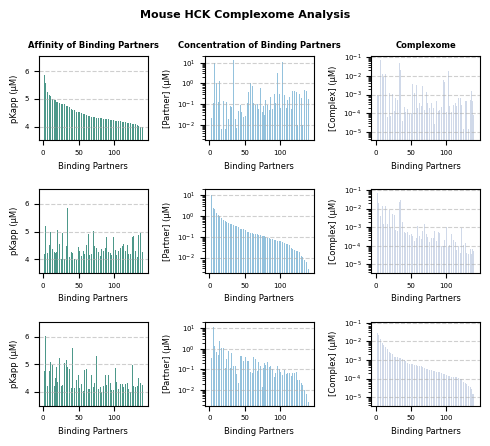

In [29]:
# Load the matched dataset
df_Matching = pd.read_csv('/home/gogllab/Desktop/Quantitative_Interactomics/output/Matching.csv', header=[0, 1])

# Plot complexome for each combination of species and bait
ppi.plot_complexome_analysis(df_Matching, "Human", "SRC", "SRC_pKapp_sign", "log_SRC_Complexome")
ppi.plot_complexome_analysis(df_Matching, "Human", "HCK", "HCK_pKapp_sign", "log_HCK_Complexome")
ppi.plot_complexome_analysis(df_Matching, "Mouse", "SRC", "SRC_pKapp_sign", "log_SRC_Complexome")
ppi.plot_complexome_analysis(df_Matching, "Mouse", "HCK", "HCK_pKapp_sign", "log_HCK_Complexome")


### 10. Comparative Analysis and Plotting

Plot saved to: output/Lin_Reg_Plots/Human_SRC_HCK.png


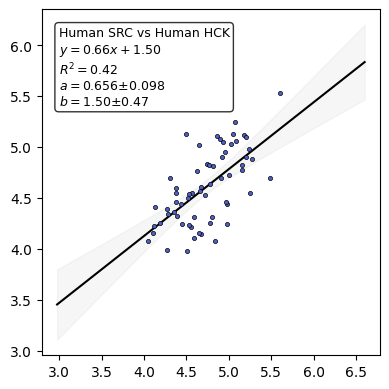

Plot saved to: output/Lin_Reg_Plots/Mouse_SRC_HCK.png


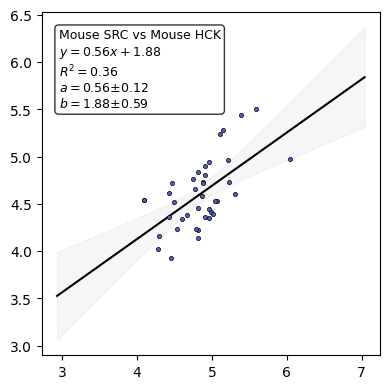

Plot saved to: output/Lin_Reg_Plots/Human_Mouse_SRC.png


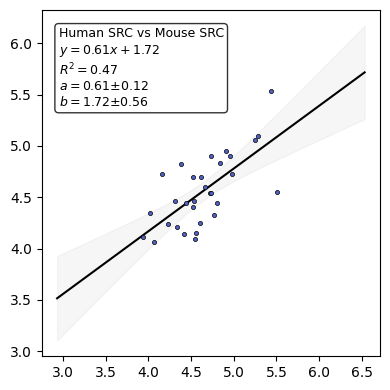

Plot saved to: output/Lin_Reg_Plots/Human_Mouse_HCK.png


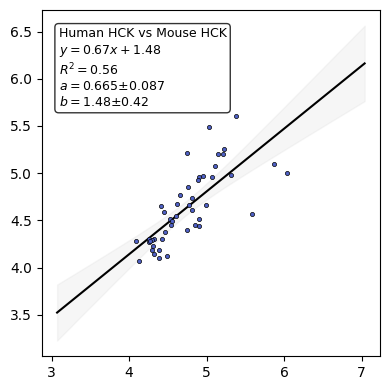

Plot saved to: output/Lin_Reg_Plots/Human_vs_Mouse_pKapp.png


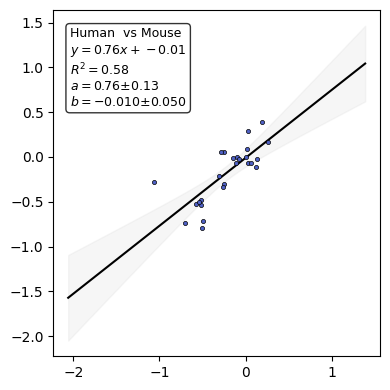

Plot saved to: output/Lin_Reg_Plots/Human_Complexome_SRC_vs_HCK.png


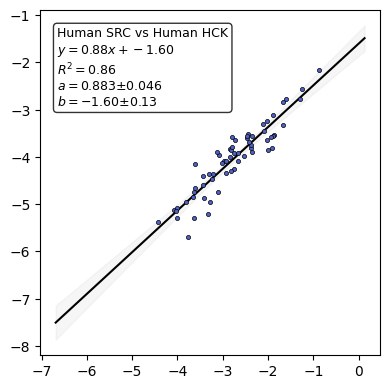

Plot saved to: output/Lin_Reg_Plots/Mouse_Complexome_SRC_vs_HCK.png


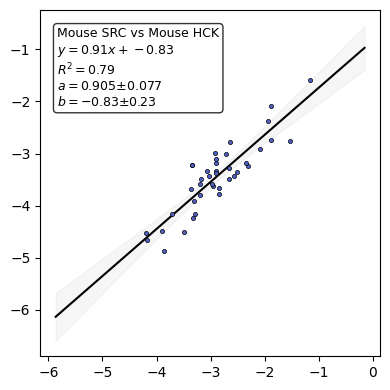

Plot saved to: output/Lin_Reg_Plots/Human_vs_Mouse_Complexome.png


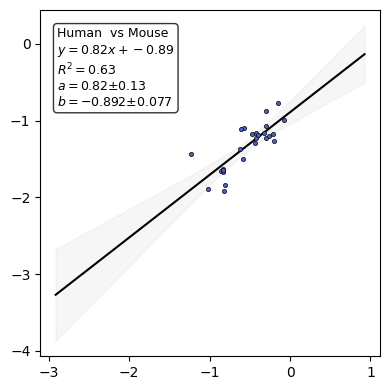

In [32]:
# Path to the matched dataset
csv_file = '/home/gogllab/Desktop/Quantitative_Interactomics/output/Matching.csv'

# Generate various comparative plots
# Intra-species comparisons of SRC vs. HCK
ppi.analyze_and_plot_correlation(csv_file, "Human_SRC_HCK",  "Human", 'HCK_pKapp_sign', 'Human',  'SRC_pKapp_sign', 'Human SRC vs HCK', 'affinity', annotate_genes=False)
ppi.analyze_and_plot_correlation(csv_file, "Mouse_SRC_HCK",  "Mouse", 'HCK_pKapp_sign', 'Mouse',  'SRC_pKapp_sign', 'Mouse SRC vs HCK', 'affinity', annotate_genes=False)

# Inter-species comparisons for SRC and HCK
ppi.analyze_and_plot_correlation(csv_file, "Human_Mouse_SRC",  "Mouse", 'SRC_pKapp_sign', 'Human',  'SRC_pKapp_sign', 'Human vs Mouse SRC', 'affinity', annotate_genes=False)
ppi.analyze_and_plot_correlation(csv_file, "Human_Mouse_HCK",  "Mouse", 'HCK_pKapp_sign', 'Human',  'HCK_pKapp_sign', 'Human  vs Mouse HCK', 'affinity', annotate_genes=False)
ppi.analyze_and_plot_correlation(csv_file, 'Human_vs_Mouse_pKapp', "Mouse", 'delta_pKapp', "Human", 'delta_pKapp', 'Human vs Mouse', 'delta_pKapp', annotate_genes=False)

# Complexome comparisons
ppi.analyze_and_plot_correlation(csv_file, "Human_Complexome_SRC_vs_HCK",  "Human", 'log_HCK_Complexome', 'Human',  'log_SRC_Complexome', ' Human Complexome SRC VS HCK', 'log_complexome', annotate_genes=False)
ppi.analyze_and_plot_correlation(csv_file, "Mouse_Complexome_SRC_vs_HCK",  "Mouse", 'log_HCK_Complexome', 'Mouse',  'log_SRC_Complexome', 'Mouse Complexome SRC VS HCK', 'log_complexome', annotate_genes=False)
ppi.analyze_and_plot_correlation(csv_file, 'Human_vs_Mouse_Complexome', "Mouse",'ratio_log_intra', "Human", 'ratio_log_intra', 'Human vs Mouse Complexome', 'log_ratio_complexome',annotate_genes=False)

